In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Library

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read Data % EDA

In [39]:
df = pd.read_csv(R'C:\Users\abdal\GTC-Heart-Disease-Risk-Prediction\heart (1).csv')

In [40]:
df.shape

(1025, 14)

In [41]:
df.head().style.background_gradient(cmap='Reds')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [42]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.duplicated().sum()

723

In [46]:
df.nunique().sum()

400

In [47]:
for column in df.columns:
    print(f"Column: {column} → {df[column].nunique()} unique values")


Column: age → 41 unique values
Column: sex → 2 unique values
Column: cp → 4 unique values
Column: trestbps → 49 unique values
Column: chol → 152 unique values
Column: fbs → 2 unique values
Column: restecg → 3 unique values
Column: thalach → 91 unique values
Column: exang → 2 unique values
Column: oldpeak → 40 unique values
Column: slope → 3 unique values
Column: ca → 5 unique values
Column: thal → 4 unique values
Column: target → 2 unique values


**Visulization**

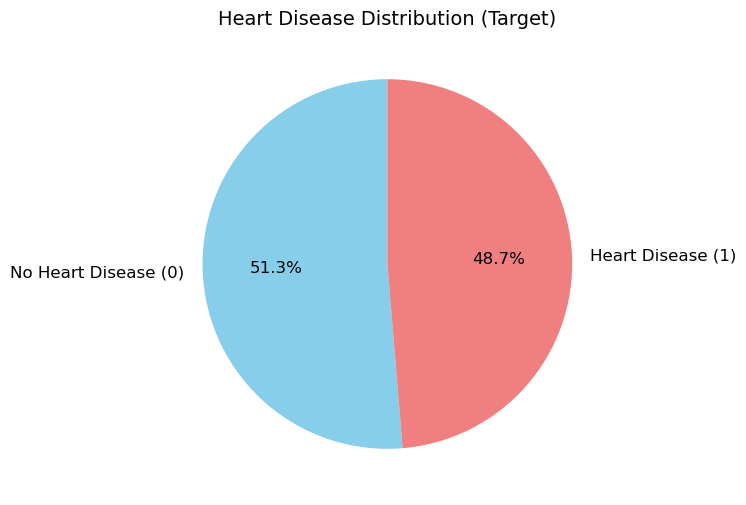

In [48]:
target_counts = df['target'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(target_counts,
        labels=['No Heart Disease (0)', 'Heart Disease (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral'],
        textprops={'fontsize':12})

plt.title('Heart Disease Distribution (Target)', fontsize=14)
plt.show()


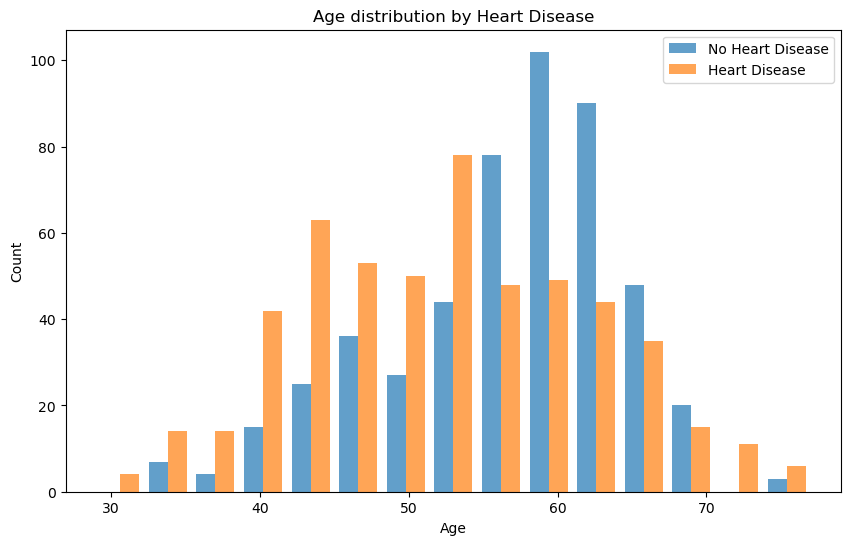

In [49]:
plt.figure(figsize=(10,6))
plt.hist([df[df['target']==0]['age'], df[df['target']==1]['age']],
         bins=15, label=['No Heart Disease', 'Heart Disease'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by Heart Disease')
plt.legend()
plt.show()


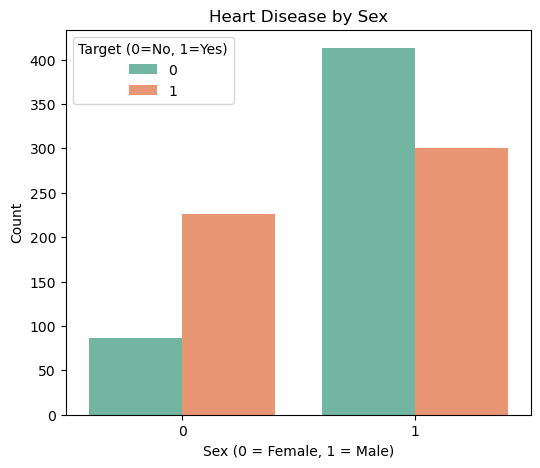

In [50]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='sex', hue='target', palette='Set2')

plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


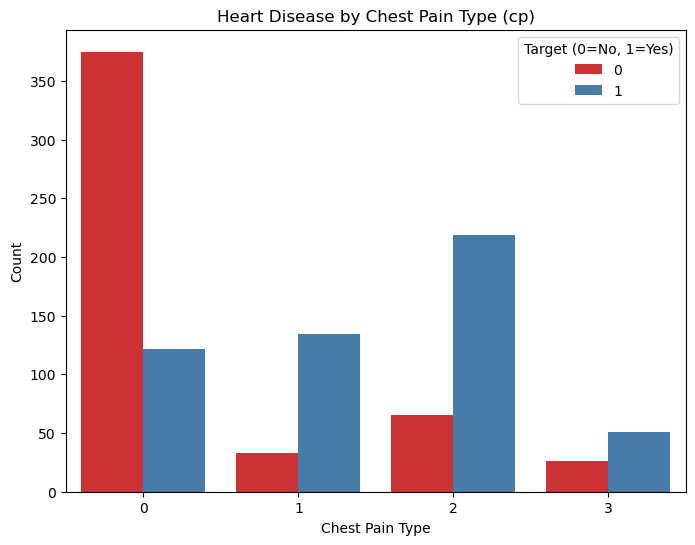

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')

plt.title('Heart Disease by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


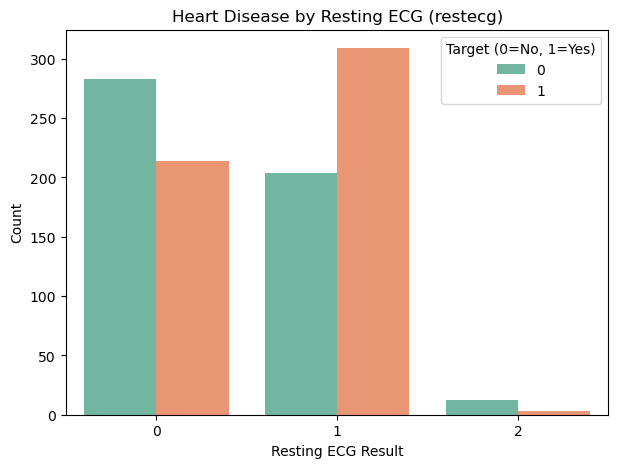

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='restecg', hue='target', palette='Set2')

plt.title('Heart Disease by Resting ECG (restecg)')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


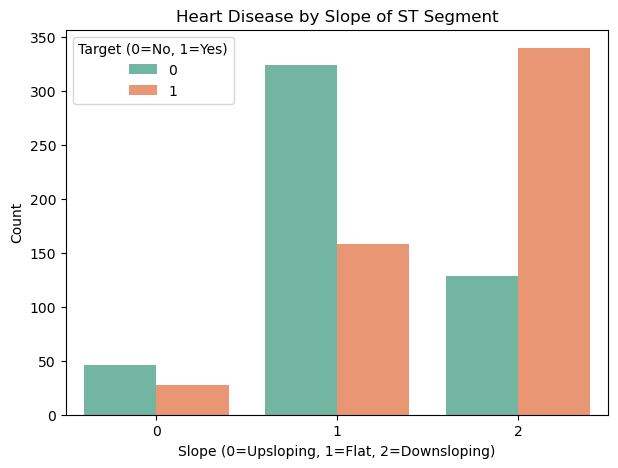

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='slope', hue='target', palette='Set2')

plt.title('Heart Disease by Slope of ST Segment')
plt.xlabel('Slope (0=Upsloping, 1=Flat, 2=Downsloping)')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


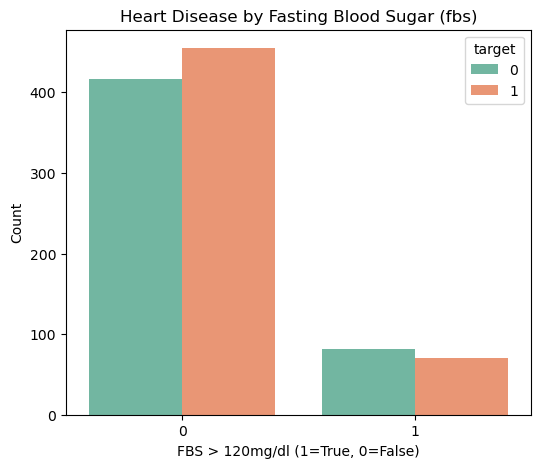

In [54]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='fbs', hue='target', palette='Set2')
plt.title('Heart Disease by Fasting Blood Sugar (fbs)')
plt.xlabel('FBS > 120mg/dl (1=True, 0=False)')
plt.ylabel('Count')
plt.show()


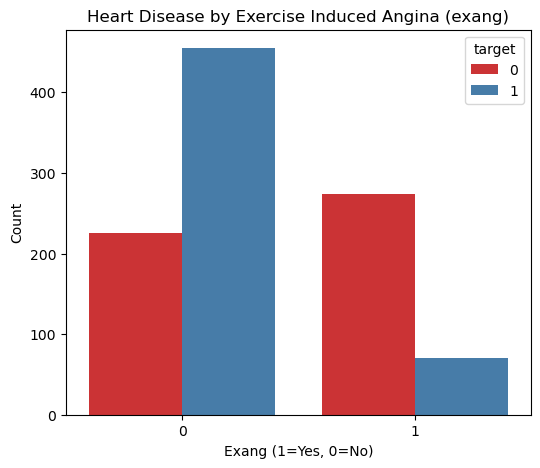

In [55]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='exang', hue='target', palette='Set1')
plt.title('Heart Disease by Exercise Induced Angina (exang)')
plt.xlabel('Exang (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


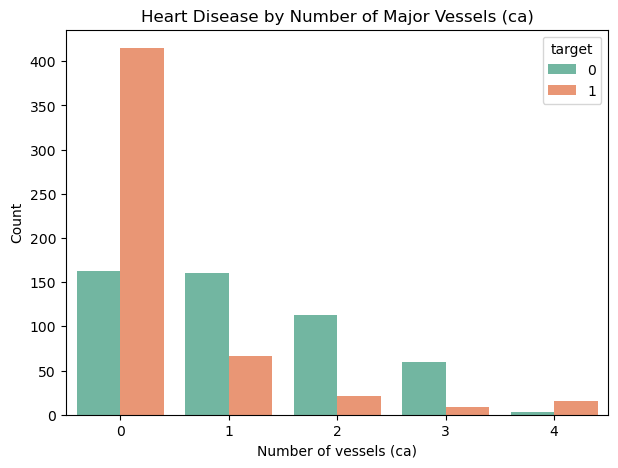

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ca', hue='target', palette='Set2')
plt.title('Heart Disease by Number of Major Vessels (ca)')
plt.xlabel('Number of vessels (ca)')
plt.ylabel('Count')
plt.show()


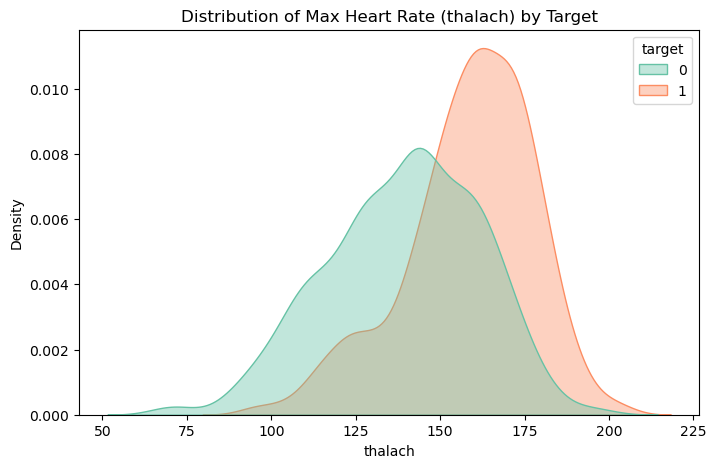

In [57]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='thalach', hue='target', fill=True, palette='Set2', alpha=0.4)
plt.title('Distribution of Max Heart Rate (thalach) by Target')
plt.show()


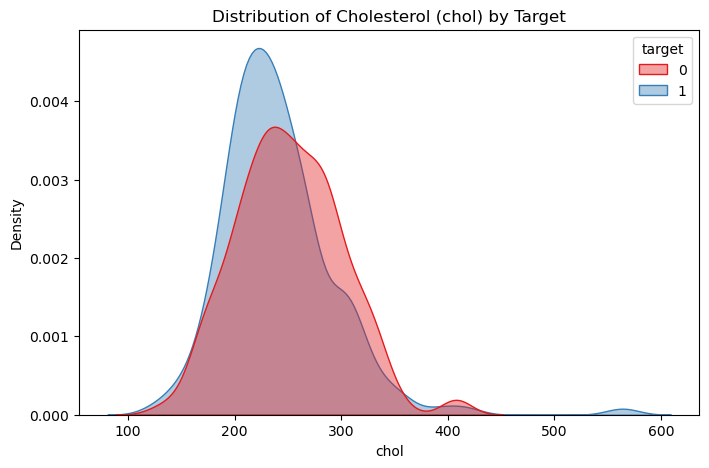

In [58]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='chol', hue='target', fill=True, palette='Set1', alpha=0.4)
plt.title('Distribution of Cholesterol (chol) by Target')
plt.show()


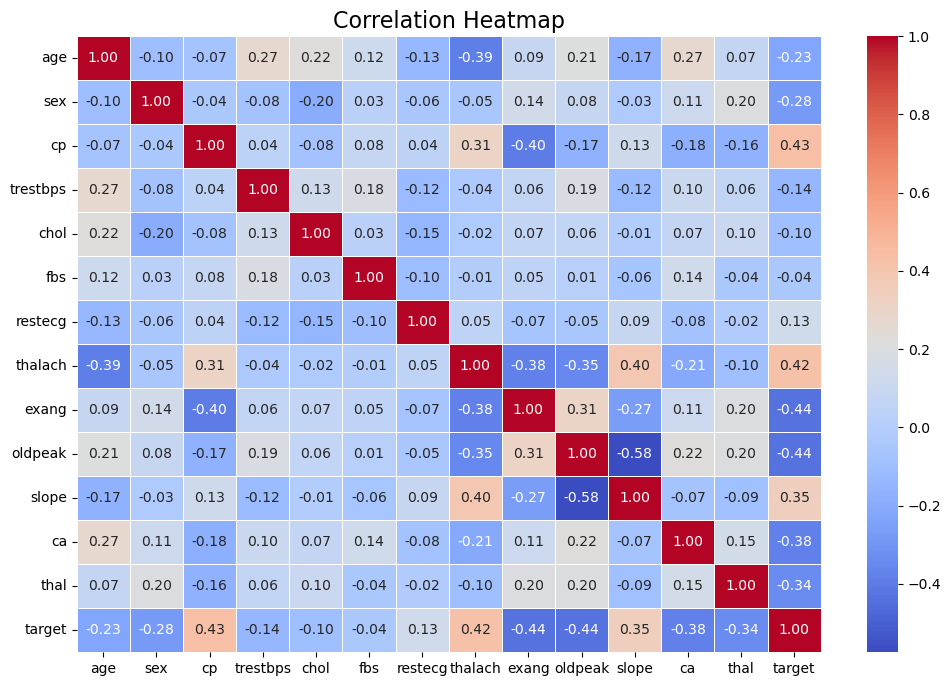

In [59]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


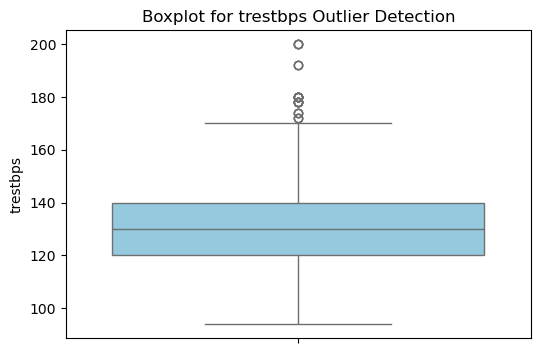

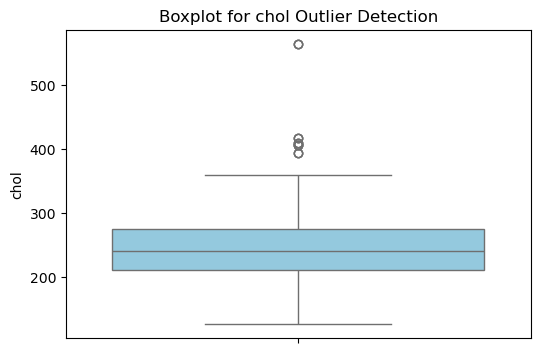

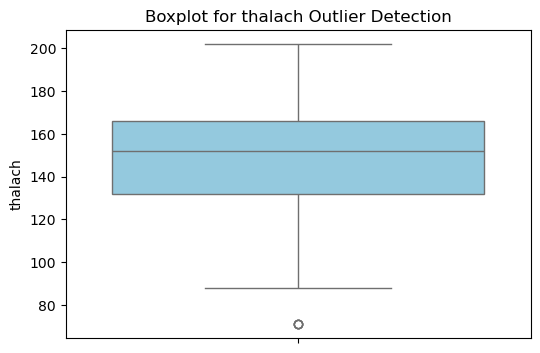

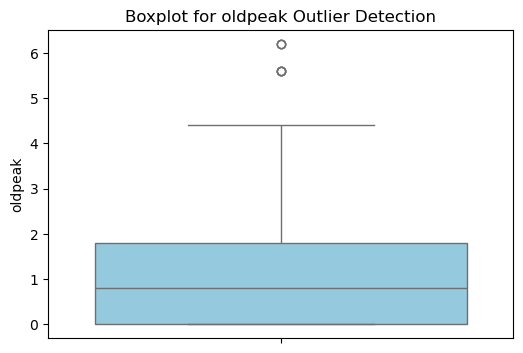

In [60]:
cols_to_plot = ['trestbps','chol','thalach','oldpeak']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot for {col} Outlier Detection", fontsize=12)
    plt.show()


## Data cleaning


In [35]:
df_clean= df.drop_duplicates()

In [36]:
df_clean.duplicated().sum()

0

### removing outliers

In [61]:
Q1 = df_clean["chol"].quantile(0.25)
Q3 = df_clean["chol"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outlier = df_clean[(df_clean["chol"] < batas_bawah) | (df_clean["chol"] > batas_atas)]
print(outlier)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   

     slope  ca  thal  target  
123      2   1     2       1  
158      1   0     3       1  
179      1   2     3       0  
255      1   0     2       1  
450      1   3     3       0  


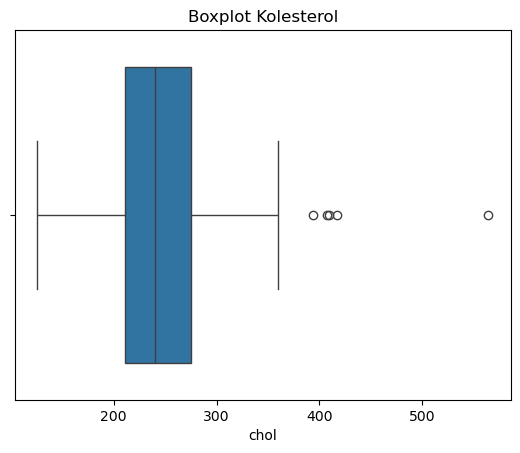

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df_clean["chol"])
plt.title("Boxplot Kolesterol")
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_clean.drop("target", axis=1)
y = df_clean["target"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (241, 13)
Test size  :  (61, 13)


In [65]:
#One-Hot Encoding Categorical + Standard Scaler Numerical

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_cols = ["cp", "restecg", "slope", "thal"]

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])   
X_test_num = scaler.transform(X_test[numeric_cols])         

encoder = OneHotEncoder(drop="first", sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])  
X_test_cat = encoder.transform(X_test[categorical_cols])       

print("X_train:", X_train_cat)
print("X_test:", X_test_cat)

X_train: [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]
X_test: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [

In [66]:
binary_cols = ["sex", "fbs", "exang"]
X_train_final = pd.concat(
    [
        pd.DataFrame(X_train_num, index=X_train.index, columns=numeric_cols),
        pd.DataFrame(X_train_cat, index=X_train.index, columns=encoder.get_feature_names_out(categorical_cols)),
        X_train[binary_cols].reset_index(drop=True)
    ],
    axis=1
)

X_test_final = pd.concat(
    [
        pd.DataFrame(X_test_num, index=X_test.index, columns=numeric_cols),
        pd.DataFrame(X_test_cat, index=X_test.index, columns=encoder.get_feature_names_out(categorical_cols)),
        X_test[binary_cols].reset_index(drop=True)
    ],
    axis=1
)

print("Shape X_train_final:", X_train_final.shape)
print("Shape X_test_final :", X_test_final.shape)

Shape X_train_final: (338, 18)
Shape X_test_final : (111, 18)


In [67]:
categorical_cols = ["cp", "restecg", "slope", "thal"] 
binary_cols = ["sex", "fbs", "exang"]  
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),  
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="passthrough")

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
norm = 0
nonorm = 0
for col in X_train.columns:
  if X_train[col].skew() >=-0.5 and X_train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [69]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Heart Disease Data Analysis Report

This report aims to summarize the Exploratory Data Analysis (EDA) performed on the heart disease dataset.

## Data Overview

- The dataset contains **1025** rows and **14** columns.
- There are no missing values in any of the columns.
- **723** duplicate rows were found in the dataset. (Note: Duplicates can be handled as needed for subsequent analysis or modeling).
- The columns contain numerical data types (int64 and float64).

## Variable Analysis

### Target Variable

- The distribution of the target variable (presence or absence of heart disease) is almost balanced:
    - **51.3%** have heart disease (1)
    - **48.7%** do not have heart disease (0)

### Age

- The age distribution shows that individuals with heart disease tend to be in different age groups compared to those without, with cases observed across all age categories.

### Sex

- The analysis shows that males (1) have a higher number of heart disease cases compared to females (0) in this dataset.

### Chest Pain Type (cp)

- The distribution of heart disease by chest pain type shows that some types (such as type 1, type 2, and type 3) may be more strongly associated with the presence of heart disease compared to type 0.

### Resting ECG (restecg)

- The distribution of heart disease by resting ECG result shows that results 0 and 1 contain heart disease cases.

### Slope of ST Segment (slope)

- The analysis of the slope of the ST segment indicates that slope 2 might be more common among individuals with heart disease.

### Fasting Blood Sugar (fbs)

- There is no strong and clear correlation between fasting blood sugar and the presence of heart disease based on this analysis, as the majority of cases (whether they have heart disease or not) have fbs less than 120 mg/dl.

### Exercise Induced Angina (exang)

- Individuals with exercise-induced angina (1) show a higher number of heart disease cases compared to those without (0).

### Number of Major Vessels (ca)

- The probability of having heart disease increases with the number of major vessels colored by fluoroscopy (ca), especially when there are 1, 2, or 3 vessels.

### Maximum Heart Rate Achieved (thalach)

- The distribution of maximum heart rate achieved shows that individuals with heart disease tend to have a higher heart rate compared to those without.

### Cholesterol (chol)

- The distribution of cholesterol shows significant overlap between the target groups (with and without heart disease), and there is no clear and significant difference in cholesterol levels between the two groups in this initial analysis.

## Correlation Heatmap

- The correlation heatmap shows the relationships between different variables.
- **Variables positively correlated with Target:** cp, thalach, slope, restecg, fbs (weak correlation)
- **Variables negatively correlated with Target:** exang, oldpeak, ca, thal, sex, age, trestbps (weak correlation), chol (weak correlation)
- A strong correlation appears between some independent variables (such as oldpeak and slope).

## Outlier Detection

- Boxplots were used to detect outliers in the quantitative variables: trestbps, chol, thalach, oldpeak.
- Outliers are present in all these variables, which may require handling depending on the machine learning model used later.

## Conclusion

The exploratory data analysis suggests that several factors such as age, sex, chest pain type, exercise-induced angina, number of major vessels, and maximum heart rate achieved may be important indicators of the presence of heart disease. The presence of outliers and duplicates in the data has also been identified and should be considered in the data preprocessing and modeling stages.